# Proyecto Final

## Programación

## Profesor: Ing. Andrés Mena A.

### **Nombre del estudiante: Stephanny Garita Vega**

### **Objetivo principal:**

“Analizar el comportamiento inicial de los prospectos ingresados durante la campaña del IIIQ 2025, identificando tendencias en fecha de ingreso, carreras de interés, origen de captación, base académica y estado del prospecto, con el fin de comprender mejor el perfil de los leads y orientar estrategias de marketing y seguimiento.”

Con esto podemos analizar:

✔ En cuáles carreras tienen más interés
✔ Qué canal trae más prospectos
✔ Cuántos prospectos llegan por día / semana
✔ Distribución por nivel académico
✔ Prospectos trabajados, contactados, convertidos


In [2]:
pip install pandas openpyxl numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import locale

try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_ES')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'es_MX.UTF-8')
        except locale.Error:
            print("Advertencia: No se pudo establecer el locale a español. Los días pueden estar en inglés.")

df = pd.read_excel("prospectos.xlsx")
display(df.head())

,Fecha_ingreso,Nombre,Estatus,Contador,Origen,Etapa,Carrera_interés,Fecha_modificado,Base,Grado_académico
0,2025-09-30 20:22:35,Alexander,WhatsApp (CONTACTO 3),4,Página Castro Carazo,Contactado,Técnico en Gestión de Proyectos,2025-10-27 14:46:36,Nuevo IIIQ,Técnicos
1,2025-09-30 16:09:23,Brandon Araya,Registro Duplicado(*),1,Página Castro Carazo,Registro Duplicado(*),Cisco (CCNA),2025-10-01 10:51:38,Nuevo IIIQ,Técnicos
2,2025-09-30 13:56:59,Nayarith,Registro Duplicado(*),2,Página Castro Carazo,Registro Duplicado(*),Técnico en Marketing Digital,2025-10-01 10:46:18,Nuevo IIIQ,Técnicos
3,2025-09-30 12:54:05,Mel,Llamar luego,3,WhatsApp - WA Nuevos,Contactado,NaN,2025-10-17 15:27:58,Nuevo IIIQ,Técnicos
4,2025-09-30 11:32:51,Anfony Sánchez Barquero,Registro Duplicado(*),1,Página Castro Carazo,Registro Duplicado(*),Técnico Contabilidad,2025-09-30 13:41:27,Nuevo IIIQ,Técnicos


Limpieza básica del archivo

In [43]:
# Eliminar espacios en columnas
df.columns = df.columns.str.strip()

# Remplazar strings vacíos o "nan"
df = df.replace([" ", ""], pd.NA)

# Convertir fechas correctamente
df["Fecha_ingreso"] = pd.to_datetime(df["Fecha_ingreso"], errors="coerce")
df["Fecha_modificado"] = pd.to_datetime(df["Fecha_modificado"], errors="coerce")

Se identifican valores faltantes:

In [44]:
print(df.isnull().sum())

Fecha_ingreso         0
Nombre                0
Estatus               0
Contador              0
Origen                0
Etapa                 0
Carrera_interés     250
Fecha_modificado      0
Base                  0
Grado_académico       0
dtype: int64


Se cuenta la cantidad de leads:

In [45]:
print("Total de leads:", len(df))


Total de leads: 1803


Se identifica la cantidad de leads que ingresaron según el origen:

In [46]:
print(df["Origen"].value_counts())

Origen
Página Castro Carazo       578
Formulario Web Facebook    509
Formulario Web Google      285
WhatsApp - WA Nuevos       244
Formulario Web             110
Sin Especificar             47
Facebook                    27
Walk In                      2
Instagram                    1
Name: count, dtype: int64


Se identifica la cantidad de leads que ingresaron según la carrera de interés:

In [47]:
print(df["Carrera_interés"].value_counts())

Carrera_interés
Cisco (CCNA)                                                           206
Técnico en Análisis de Datos                                           120
Bachillerato Contaduría                                                106
Técnico Contabilidad                                                   104
Licenciatura en Docencia                                                80
Técnico Ciber Seguridad                                                 80
Bachillerato Derecho                                                    58
Técnico en Marketing Digital                                            56
Bachillerato Administración con Énfasis en Recursos Humanos             54
Técnico en Control de Calidad                                           45
Curso Libre Inglés                                                      44
Bachillerato Administración de Aduanas                                  38
Técnico Ciberseguridad 2.0                                              38
Bachiller

Se identifica la cantidad de leads que ingresan según la fecha de ingreso (por mes):

In [48]:
# Crear columnas para Año, Mes y Semana
df['Año'] = df['Fecha_ingreso'].dt.year
df['Mes_Num'] = df['Fecha_ingreso'].dt.month
df['Mes'] = df['Fecha_ingreso'].dt.strftime('%B')
df['Semana'] = df['Fecha_ingreso'].dt.isocalendar().week.astype(int)
df['Dia_Semana'] = df['Fecha_ingreso'].dt.day_name()
df['Hora'] = df['Fecha_ingreso'].dt.hour

leads_por_mes_anual = df.groupby(['Año', 'Mes']).size().reset_index(name='Total_Leads')

print("\n📊 Tabla de Leads Agrupados por mes:")
display(leads_por_mes_anual) 






📊 Tabla de Leads Agrupados por mes:


,Año,Mes,Total_Leads
0,2025,agosto,744
1,2025,julio,704
2,2025,junio,37
3,2025,septiembre,318


Se identifica la cantidad de leads que ingresan según la fecha de ingreso (por semana):

In [49]:
# --- 1. Preparación de Datos y Cálculo de 'Semana del Mes' ---


# La fórmula (día - 1) // 7 + 1 asigna los días 1-7 a la Semana 1, 8-14 a la Semana 2, etc.
df['Semana_Mes'] = (df['Fecha_ingreso'].dt.day - 1) // 7 + 1


# Columna con el nombre del mes para la etiqueta (en español)
df['Nombre_Mes'] = df['Fecha_ingreso'].dt.strftime('%B')



# --- 2. Interacción con el Usuario (Preguntar el Mes) ---


try:
    # Usamos input() para detener la ejecución y esperar la entrada del usuario
    mes_seleccionado = int(input("👉 Por favor, introduce el número del mes que quieres analizar (1=Enero, 12=Diciembre):"))
    if not 1 <= mes_seleccionado <= 12:
        raise ValueError
except ValueError:
    print("❌ Entrada inválida. Por favor, reinicia la celda e introduce un número entero del 1 al 12.")
    raise SystemExit(0) 


# --- 3. Filtrar y Agrupar los Datos ---


df_filtrado = df[df['Mes_Num'] == mes_seleccionado]


if df_filtrado.empty:
    print(f"\n⚠️ No se encontraron leads para el mes número {mes_seleccionado}.")
else:
    # Obtener el nombre del mes filtrado
    nombre_mes = df_filtrado['Nombre_Mes'].iloc[0].capitalize()
    
    
    # Agrupar por Año y la Semana Calculada del Mes
    leads_por_semana_mes = df_filtrado.groupby(['Año','Mes','Semana_Mes']).size().reset_index(name='Total_Leads')


    # Renombrar 'Semana_Mes' para que la tabla sea más clara
    leads_por_semana_mes = leads_por_semana_mes.rename(columns={'Semana_Mes': 'Semana del Mes'})


    print(f"\n✅ **Tabla de Leads Agrupados por Semana - Mes de {nombre_mes}:**")
    
    # Mostrar la tabla de resultados ordenada por año y semana
    display(leads_por_semana_mes.sort_values(by=['Año', 'Semana del Mes']))


✅ **Tabla de Leads Agrupados por Semana - Mes de Agosto:**


,Año,Mes,Semana del Mes,Total_Leads
0,2025,agosto,1,203
1,2025,agosto,2,181
2,2025,agosto,3,149
3,2025,agosto,4,163
4,2025,agosto,5,48


Se identifica la cantidad de leads que ingresaron según el grado académico:

In [72]:
conteo_grado = df['Grado_académico'].value_counts()

porcentajes_grado = conteo_grado / conteo_grado.sum() * 100

resumen = pd.DataFrame({
    "Cantidad": conteo_grado,
    "Porcentaje": porcentajes_grado.map(lambda x: f"{x:.2f}%")
})

print(resumen)


                          Cantidad Porcentaje
Grado_académico                              
Técnicos                      1116     61.90%
Bachillerato                   391     21.69%
Licenciatura                   174      9.65%
Cursos Libres                   50      2.77%
Bachillerato por Madurez        46      2.55%
Postgrados                      25      1.39%
Programas Ejecutivos             1      0.06%


Se identifica la cantidad de leads según la etapa de trabajo:

In [78]:
conteo_estatus = df['Estatus'].value_counts()

porcentajes_estatus = conteo_estatus / conteo_estatus.sum() * 100

resumen = pd.DataFrame({
    "Cantidad": conteo_estatus,
    "Porcentaje": porcentajes_estatus.map(lambda x: f"{x:.2f}%")
})

print(resumen)

                                   Cantidad Porcentaje
Estatus                                               
No contesta 4(*)                        665     36.88%
No cuenta con el dinero(*)              379     21.02%
Registro Duplicado(*)                   199     11.04%
Solicita información por correo          87      4.83%
WhatsApp (NO_CONTACTO 2)                 63      3.49%
No se imparte carrera(*)                 63      3.49%
Matriculado                              42      2.33%
WhatsApp (NO_CONTACTO 3)                 34      1.89%
Estudiante avanzado(*)                   31      1.72%
WhatsApp (CONTACTO 3)                    25      1.39%
WhatsApp (CONTACTO 2)                    23      1.28%
Por horarios(*)                          22      1.22%
Matriculó en otra Universidad(*)         22      1.22%
No solicité información(*)               21      1.16%
Llamar luego                             20      1.11%
Acordó próxima llamada                   18      1.00%
Próximo pe

Gráfico de Tendencia de cantidad de leads según origen:

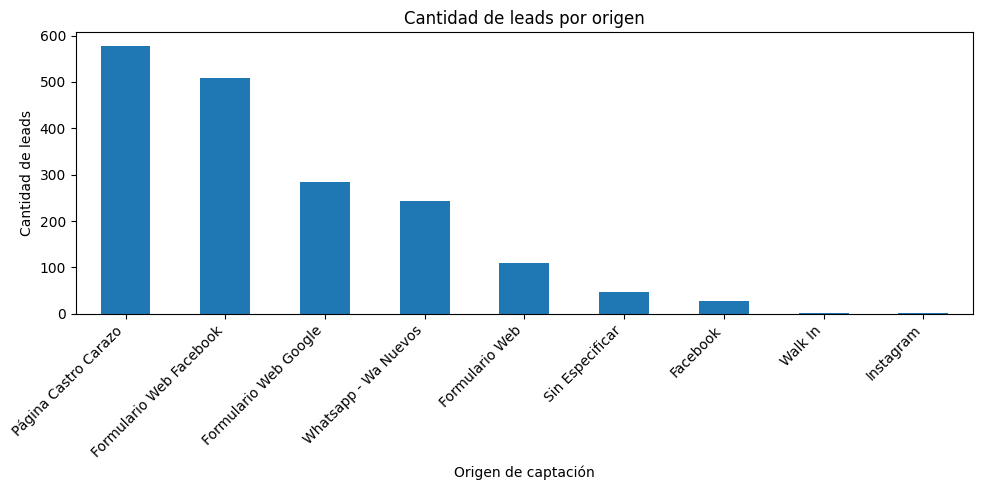

In [79]:
import matplotlib.pyplot as plt

# Limpiar la columna Origen (recomendado)
df["Origen"] = df["Origen"].astype(str).str.strip().str.title()
df["Origen"] = df["Origen"].replace(["", "Nan", "Na"], "Desconocido")

# Contar leads por origen
conteo_origen = df["Origen"].value_counts()

# Graficar
plt.figure(figsize=(10,5))
conteo_origen.plot(kind="bar")

plt.title("Cantidad de leads por origen")
plt.xlabel("Origen de captación")
plt.ylabel("Cantidad de leads")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

Gráfico de Tendencia de cantidad de leads según grado académico

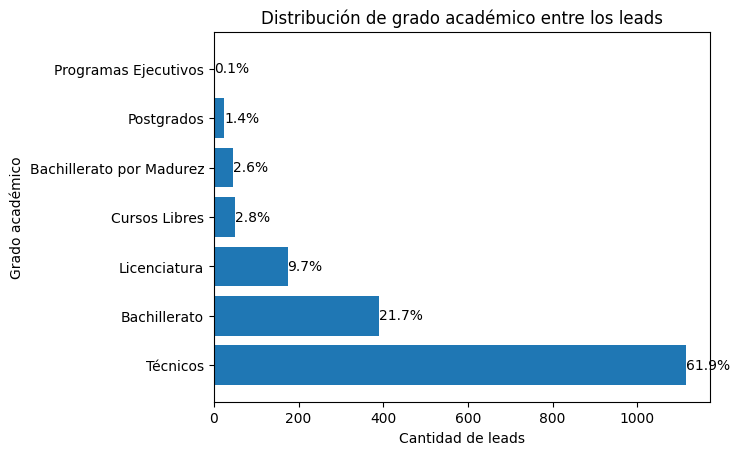

In [80]:
plt.figure()
plt.barh(conteo.index, conteo.values)
plt.xlabel("Cantidad de leads")
plt.ylabel("Grado académico")
plt.title("Distribución de grado académico entre los leads")
for i, valor in enumerate(conteo.values):
    porcentaje = porcentajes.iloc[i]
    plt.text(
        valor,          # posición en X (al final de la barra)
        i,              # posición en Y
        f"{porcentaje:.1f}%",  # texto con porcentaje
        va='center'
    )
plt.show()